圓心座標（對應反射係數）：(0.0024675166832873463-0.013930546442361406j)
圓半徑：0.38415275057831527
駐波比（SWR）：1.0287008303693401
負載阻抗（ZL）：50.23 + j-1.40 歐姆


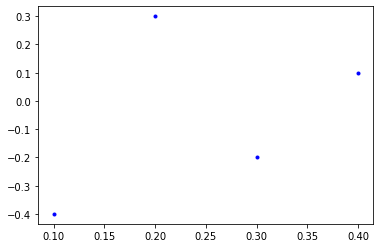

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from circle_fit import taubinSVD

# 假設有一組複數反射係數數據點
gamma_points = np.array([
    0.2 + 0.3j,
    0.4 + 0.1j,
    0.3 - 0.2j,
    0.1 - 0.4j
])

# 將複數數據點轉換為實數平面上的點
points = np.column_stack((gamma_points.real, gamma_points.imag))

# 使用 Taubin SVD 方法進行圓擬合
xc, yc, r, sigma = taubinSVD(points)

# 計算圓心對應的反射係數
gamma_center = complex(xc, yc)

# 計算駐波比（SWR）
SWR = (1 + abs(gamma_center)) / (1 - abs(gamma_center))

# 計算對應的負載阻抗（假設系統特徵阻抗 Z0 = 50 歐姆）
Z0 = 50
ZL = Z0 * (1 + gamma_center) / (1 - gamma_center)
plt.plot(np.real(gamma_points[:]),np.imag(gamma_points[:]),'b.')


print(f"圓心座標（對應反射係數）：{gamma_center}")
print(f"圓半徑：{r}")
print(f"駐波比（SWR）：{SWR}")
print(f"負載阻抗（ZL）：{ZL.real:.2f} + j{ZL.imag:.2f} 歐姆")


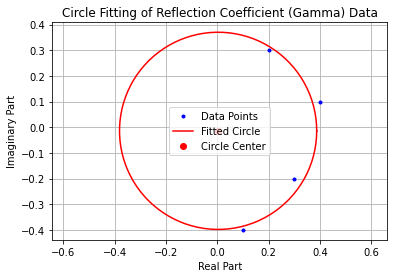

圓心座標（對應反射係數）：(0.0024675166832873463-0.013930546442361406j)
圓半徑：0.38415275057831527
駐波比（SWR）：1.0287008303693401
負載阻抗（ZL）：50.23 + j-1.40 歐姆


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from circle_fit import taubinSVD

# 假設有一組複數反射係數數據點
gamma_points = np.array([
    0.2 + 0.3j,
    0.4 + 0.1j,
    0.3 - 0.2j,
    0.1 - 0.4j
])

# 將複數數據點轉換為實數平面上的點
points = np.column_stack((gamma_points.real, gamma_points.imag))

# 使用 Taubin SVD 方法進行圓擬合
xc, yc, r, sigma = taubinSVD(points)

# 計算圓心對應的反射係數
gamma_center = complex(xc, yc)

# 計算駐波比（SWR）
SWR = (1 + abs(gamma_center)) / (1 - abs(gamma_center))

# 計算對應的負載阻抗（假設系統特徵阻抗 Z0 = 50 歐姆）
Z0 = 50
ZL = Z0 * (1 + gamma_center) / (1 - gamma_center)

# 繪製原始數據點
plt.plot(np.real(gamma_points[:]), np.imag(gamma_points[:]), 'b.', label='Data Points')

# 繪製擬合的圓
theta = np.linspace(0, 2*np.pi, 100)
x = xc + r * np.cos(theta)
y = yc + r * np.sin(theta)
plt.plot(x, y, 'r-', label='Fitted Circle')

# 標記圓心
plt.plot(xc, yc, 'ro', label='Circle Center')

# 圖形設置
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Circle Fitting of Reflection Coefficient (Gamma) Data')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

print(f"圓心座標（對應反射係數）：{gamma_center}")
print(f"圓半徑：{r}")
print(f"駐波比（SWR）：{SWR}")
print(f"負載阻抗（ZL）：{ZL.real:.2f} + j{ZL.imag:.2f} 歐姆")


## 試試看用S11化緣!!


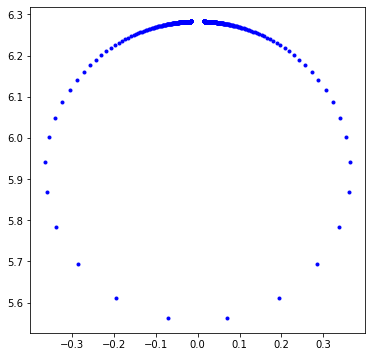

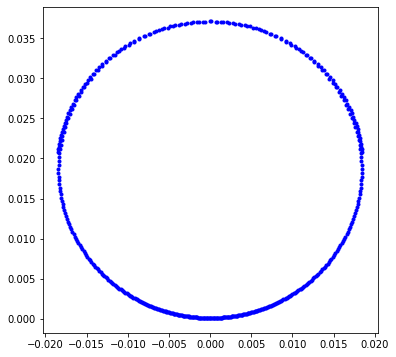

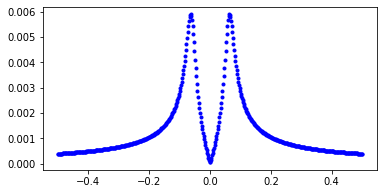

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def s11( omega, omega_m, alpha, kappa):
    Gamma = 2*np.pi*(alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))*2*np.pi
    return s11

def s21( omega, omega_c, omega_m, kappa, alpha, beta, gamma):
    S_21 = (- kappa / (1j*(omega - omega_c)-(kappa+beta)+ gamma**2/(1j*(omega - omega_m)-alpha) ))*2*np.pi
    return (S_21)

def abs_s21(f,omega_c, omega_m, kappa, alpha, beta, gamma):
    omega = 2 * np.pi * f
    S_21 = - kappa / (1j*(omega - omega_c)-(kappa+beta)+ gamma**2/(1j*(omega - omega_m)-alpha) )
    return abs(S_21)

omega = np.linspace(-0.5, 0.5, 500)  #(GHz)
omega_m = 0
omega_c = 0
kappa = 0.0012 #(GHz)
alpha = 0.0021 #(GHz)
beta =  0.2 #(GHz)
gamma =  0.4 #(GHz)

data = s11( omega, omega_m, alpha, kappa)
data_2 = s21(omega, omega_c, omega_m, kappa, alpha, beta, gamma)

plt.figure(figsize=(6,6))
plt.plot(data.imag, data.real, 'b.')

plt.figure(figsize=(6,6))
plt.plot(data_2.imag, data_2.real, 'b.')

plt.figure(figsize=(6,3))
plt.plot(omega, abs_s21(omega,omega_c, omega_m, kappa, alpha, beta, gamma), 'b.')




treu:  1.60e-03, 6.40e-03
fitting: [6.83749433e-11 1.60000000e-03 6.40000000e-03]


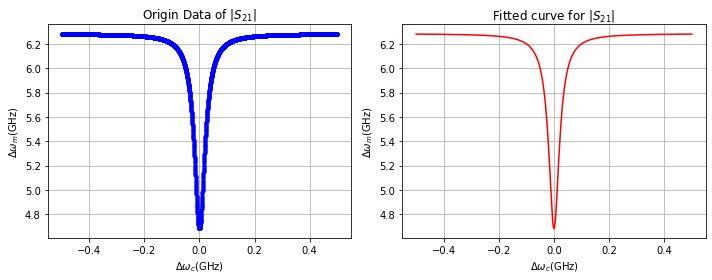

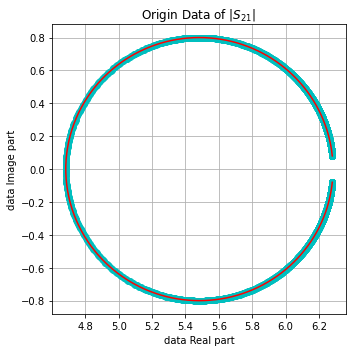

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def s11( omega, omega_m, alpha, kappa):
    Gamma = 2*np.pi*(alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))*2*np.pi
    return s11

def s11_curvefit( omega, omega_m, alpha, kappa):
    Gamma = 2*np.pi*(alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))*2*np.pi
    return np.hstack([np.real(s11), np.imag(s11)])

omega = np.linspace(-0.5, 0.5, 5000)  #(GHz)
omega_m = 0
omega_c = 0 
kappa = 0.0064 #(GHz)
alpha = 0.0016 #(GHz)
beta =  0.0016 #(GHz)
gamma =  0.0016 #(GHz)

data = s11( omega, omega_m, alpha, kappa)

popt, cov = curve_fit(
    s11_curvefit,
    omega,
    np.hstack([np.real(data), np.imag(data)]),
    [-0.02, 0.0004, 0.001]
)

s11_Fit = s11(omega , *popt)
print(f'treu:  {alpha:.2e}, {kappa:.2e}') 
print(f'fitting: {popt}')
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot( omega, abs(data), 'b.')
plt.grid(True)
plt.xlabel('$\Delta\omega_c$(GHz)')
plt.ylabel('$\Delta\omega_m$(GHz)')
plt.title('Origin Data of $|S_{21}|$')

plt.subplot(1, 2, 2)
plt.plot( omega, abs(s11_Fit), 'r-')
plt.grid(True)
plt.xlabel('$\Delta\omega_c$(GHz)')
plt.ylabel('$\Delta\omega_m$(GHz)')
plt.title('Fitted curve for $|S_{21}|$')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot( data.real, data.imag ,'co', label = 'Origin Data of $|S_{21}|$')
plt.grid(True)
plt.title('Origin Data of $|S_{21}|$')
plt.plot( s11_Fit.real, s11_Fit.imag, 'r-', label ='Fitted curve for $|S_{21}|$')
plt.xlabel('data Real part')
plt.ylabel('data Image part')
plt.tight_layout()
plt.show()



In [3]:
test = s11_curvefit( omega, omega_m, alpha, kappa)

midpoint = test.shape[-1] // 2

real_part = test[:midpoint]
imag_part = test[midpoint:]

sum = real_part + 1j*imag_part
print(data)
print(sum)

[6.27915291+0.08022208j 6.27914969+0.08025403j 6.27914646+0.080286j   ...
 6.27914646-0.080286j   6.27914969-0.08025403j 6.27915291-0.08022208j]
[6.27915291+0.08022208j 6.27914969+0.08025403j 6.27914646+0.080286j   ...
 6.27914646-0.080286j   6.27914969-0.08025403j 6.27915291-0.08022208j]


treu:  (0, 0, 0.0012, 0.0021, 0.02, 0.066)
fitting: [ 6.50065352e-10 -5.12461223e-10  1.20000000e-03  2.10000000e-03
  2.00000000e-02  6.60000000e-02]


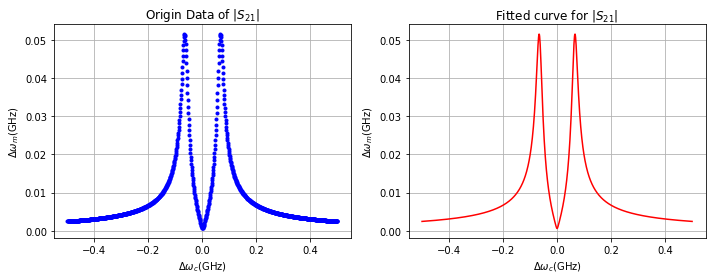

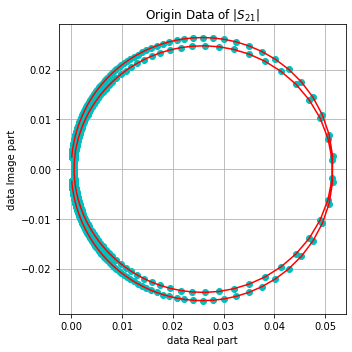

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def s21( omega, omega_c, omega_m, kappa, alpha, beta, gamma):
    S_21 = - kappa / (1j*(omega - omega_c)-(kappa+beta)+ gamma**2/(1j*(omega - omega_m)-alpha) )
    return (S_21)

def s21_curvefit( omega, omega_c, omega_m, kappa, alpha, beta, gamma):
    s21 = - kappa / (1j*(omega - omega_c)-(kappa+beta)+ gamma**2/(1j*(omega - omega_m)-alpha) )
    return np.hstack([np.real(s21), np.imag(s21)])

omega = np.linspace(-0.5, 0.5, 1000)  #(GHz)
omega_m = 0
omega_m = 0
omega_c = 0
kappa = 0.0012 #(GHz)
alpha = 0.0021 #(GHz)
beta =  0.02 #(GHz)
gamma =  0.066#(GHz)

data_1 = s21( omega, omega_c, omega_m, kappa, alpha, beta, gamma)

popt, cov = curve_fit(
    s21_curvefit,
    omega,
    np.hstack([np.real(data_1), np.imag(data_1)]),
    [0, 0.01, 0.01, 0.01, 0.54, 0.05],
    maxfev = 5000
)

s21_Fit = s21(omega , *popt)
print(f'treu:  {omega_c, omega_m, kappa, alpha, beta, gamma}') 
print(f'fitting: {popt}')
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot( omega, abs(data_1), 'b.')
plt.grid(True)
plt.xlabel('$\Delta\omega_c$(GHz)')
plt.ylabel('$\Delta\omega_m$(GHz)')
plt.title('Origin Data of $|S_{21}|$')

plt.subplot(1, 2, 2)
plt.plot( omega, abs(s21_Fit), 'r-')
plt.grid(True)
plt.xlabel('$\Delta\omega_c$(GHz)')
plt.ylabel('$\Delta\omega_m$(GHz)')
plt.title('Fitted curve for $|S_{21}|$')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot( data_1.real, data_1.imag ,'co', label = 'Origin Data of $|S_{21}|$')
plt.grid(True)
plt.title('Origin Data of $|S_{21}|$')
plt.plot( s21_Fit.real, s21_Fit.imag, 'r-', label ='Fitted curve for $|S_{21}|$')
plt.xlabel('data Real part')
plt.ylabel('data Image part')
plt.tight_layout()
plt.show()

